In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def adap_quad_comp(f,a,b,c,fa,fb,fc,Aab,tol):    
    d = (a+c)/2.
    e = (b+c)/2.
    fd = f(d)
    fe = f(e)
    dx3 = (d-a)/3.
    Aac = dx3*(fa+4.*fd+fc)
    Acb = dx3*(fc+4.*fe+fb)
    if np.abs(Aab-(Aac+Acb))<=tol: 
        return (16./15.*(Aac+Acb)-Aab/15.)
    else:  
        F1 = adap_quad_comp(f,a,c,d,fa,fc,fd,Aac,tol)
        F2 = adap_quad_comp(f,c,b,e,fc,fb,fe,Acb,tol)
        return F1 + F2
    
def adap_quad(f,a,b,tol):
    c = (a+b)/2.
    fa = f(a)
    fb = f(b)
    fc = f(c)
    dx3 = (c-a)/3.
    Aab = dx3*(fa+4.*fc+fb)
    ival = adap_quad_comp(f,a,b,c,fa,fb,fc,Aab,tol)    
    return ival

**Problem 1**: (5 pts) Use the adaptive quadrature algorithm to evaluate 

$$
\int_{-1}^{2} \frac{dt}{\sin\left(\sqrt{|t|} \right)}.
$$

State how you arrive at your result i.e. what tolerances do you choose and what degree of accuracy can you argue that they provide you?  Why do you not encounter divide-by-zero difficulties at $t=0$?

In [3]:
def function(t):
    sqrtT = np.sqrt(np.abs(t))
    sinT = np.sin(sqrtT)
    return 1 / sinT

In [4]:
tolVals = {1e-6, 1e-7, 1e-8}
[adap_quad(function, -1, 2, tolVal) for tolVal in tolVals]

[5.314115472548048, 5.314115598222085, 5.314113894050331]

We can get at least 3 digits of accuracy from using tolerance values smaller than $10^{-6}$. The reason we dont encounter any divide-by-zero difficultes at t=0 is because of how the 'adap_quad' works. The 'adap_quad' is constantly cutting in half each interval and taking the integral between those integral.  Because the integral is being evaluated between -1 and 2, 0 is luckily never called in the function to ruin it.  When we try to implement 0 into 'adap_quad', the kernel literally dies, thus proving that 'adap_quad' never takes 0 as a midpoint

**Problem 2**: (5 pts) Write a recursive program which computes $\begin{pmatrix} n \\ k \end{pmatrix}$ where for $0\leq k \leq n$

$$
\begin{pmatrix} n \\ k \end{pmatrix} = \frac{n!}{k!(n-k)!},
$$

using the formula 

$$
\begin{pmatrix} n \\ k \end{pmatrix} = \begin{pmatrix} n-1 \\ k \end{pmatrix} + \begin{pmatrix} n-1 \\ k-1 \end{pmatrix}
$$

Provide two examples which show your implementation is correct.  

In [5]:
def factorial(x):
    if x==0:
        return 1
    else:
        return x * factorial (x-1)

In [6]:
def binomialExpansion (n, k):
    nFactorial = factorial(n)
    kFactorial = factorial(k)
    nMkFactorial = factorial(n-k)
    return (nFactorial) / (kFactorial * nMkFactorial)

In [7]:
def formula (n, k):
    return binomialExpansion(n-1, k) + binomialExpansion(n-1, k-1)

In [8]:
print (binomialExpansion (10, 5))
print (formula (10, 5))

252.0
252.0


In [9]:
print (binomialExpansion (15, 7))
print (formula (15, 7))

6435.0
6435.0


**Problem 3**: (10 pts) The Hermite polynomials $H_{n}(x)$ are such that $H_{0}(x)=1$, $H_{1}(x)=2x$, and for $n\geq2$, $H_{n}(x)$ satisfies the recurrence relationship

$$
H_{n}(x) = 2xH_{n-1}(x) -2(n-1)H_{n-2}(x), ~ n\geq 2. 
$$

* (6 pts) Write a recursive program to find any Hermite polynomial $H_{n}(x)$.
* (4 pts) Generate a plot of the first six Hermite polyonmials on the interval $-2\leq x \leq 2$.  Your figure should be labeled, have a legend, and different colors should be used to distinguish the different Hermite polynmials in the plot.  

In [10]:
def hermite (x, n):
    if n == 0:
        return 0*x + 1
    elif n == 1:
        return 2*x
    else:
        return (2*x*hermite(x, n-1)) - (2*(n-1)*hermite(x, n-2))
hermite(1,0)

1

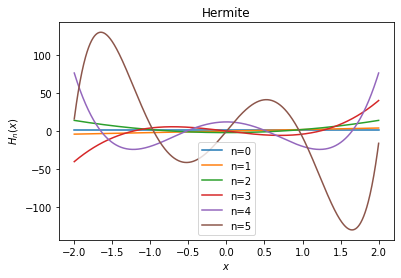

In [11]:
xvals = np.linspace(-2, 2, int(1e3))
plt.plot(xvals, hermite(xvals, 0), label = "n=0")
plt.plot(xvals, hermite(xvals, 1), label = "n=1")
plt.plot(xvals, hermite(xvals, 2), label = "n=2")
plt.plot(xvals, hermite(xvals, 3), label = "n=3")
plt.plot(xvals, hermite(xvals, 4), label = "n=4")
plt.plot(xvals, hermite(xvals, 5), label = "n=5")
plt.xlabel("$x$")
plt.ylabel("$H_{n}(x)$")
plt.title("Hermite")
plt.legend(loc="best")

**Problem 4** : (5 pts) Suppose that for two football teams, the probability, $P$, that team A will beat team B is given by 
$$
P = \frac{1+p}{2}\left(\frac{p}{1-p+p^{2}} \right)^{21}
$$
where $p$ is the probability that team A punts on a fourth down (ok, I really know nothing about football, but I think that kind of makes sense...)  Determine to within $10^{-3}$ the minimal value of $p$ that will ensure that team $A$ beats team $B$ at least half of the time.

In [12]:
#goal : find p with tol = 1e-3 with P >= .5
def winProb(puntProb):
    term1 = (1 + puntProb) / 2
    term2 = (puntProb) / (1 - puntProb + (puntProb**2))
    return term1 * (term2 **21)

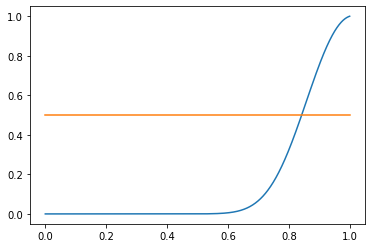

In [13]:
xvals = np.linspace(0,1,int(1e3)+1)
winHalf = np.linspace(.5,.5,int(1e3)+1)
plt.plot(xvals, winProb(xvals))
plt.plot(xvals, winHalf)

In [14]:
def bisec_method(a,b,f,tol):
    fa,fb = f(a),f(b)
    if (fa < .5 and fb > .5) or (fa > .5 and fb < .5):
        c = ( b + a ) / 2
        capproxs = np.array([c]) # build an array to record the estimates we make for the root
        fc = f(c)
        while np.abs(fc - .5) >= tol:
            if (fa < .5 and fc > .5) or (fa > .5 and fc < .5):
                b = c
            else:
                fa = fc
                a = c
            c = ( a + b ) / 2
            fc = f(c)
            capproxs = np.append(capproxs,c)
            
        print ("Our root is: %1.15f" %c)
        return capproxs[capproxs.size - 1]
    else:
        print ("Cannot ensure existence of root.")

In [15]:
bisec_method(0,1,winProb,1e-4)

Our root is: 0.842285156250000


0.84228515625

**Problem 5** : (10 pts) Using Newton's method, explain why the sequence 
$$
x_{n} = \frac{1}{2}x_{n-1} + \frac{A}{2x_{n-1}}, ~ n\geq1, ~ x_{0}>0,  
$$
converges to $\sqrt{A}$ (4 pts).  Hint, you need to think of a function whose root is $\sqrt{A}$.  Implement the method and characterize for various values of $x_{0}$ how quickly the method converges. (6 pts)

In [25]:
def rate_of_conv(capproxs):
    tterms = capproxs.size
    cstar = capproxs[tterms - 1]
    cnp1 = np.log(np.abs(capproxs[1:tterms-1] - cstar))
    cn = np.log(np.abs(capproxs[0:tterms-2] - cstar))
    ftprms = np.polyfit(cn, cnp1, 1) 
    plt.scatter(cn, cnp1)
    plt.plot(cn, (ftprms[0])*cn+ftprms[1]) 
    plt.xlabel("$\log_{10}|c_{n}-c_{*}|$")
    plt.ylabel("$\log_{10}|c_{n+1}-c_{*}|$")
    
def Newtons_method(f1,fp1,x0,tol):
    x1 = (1/2)*x0 + 9/(2*x0)
    xapprox = np.array([x0,x1])
    while np.abs(x1-x0) >= tol:
        x0 = x1
        x1 = (1/2)*x0 + 9/(2*x0)
        xapprox = np.append(xapprox,x1)
    print("Your root is %1.15f"%x1)
    rate_of_conv(xapprox)
    return xapprox[xapprox.size - 1]

In [28]:
A = 9
f = lambda x: x - np.sqrt(A)
fp = lambda x: -np.sqrt(A)

Your root is 3.000000001396984


3.000000001396984

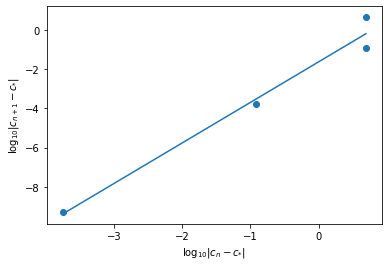

In [29]:
Newtons_method(f, fp, 1, 1e-3)

**-5** Missing conclusion of the convergence. Also `fp` looks off.

---

**Problem 6**: (5pts) In class for a root $x_{\ast}$ of $f(x)$, i.e. $f(x_{\ast})=0$, if $x_{0}$ is chosen "close" to $x_{\ast}$, then the sequence $\left\{x_{n}\right\}_{n=0}^{\infty}$  where 

$$
x_{n+1} = g\left(x_{n}\right), ~ g(x) = x - \frac{f(x)}{f'(x)}, ~ n\geq 0.
$$

should converge to $x_{\ast}$.  The question is how quickly.  So supposing that $f'(x_{\ast})\neq 0$ show 

* $g(x_{\ast}) = x_{\ast}$ (thus making $x_{\ast}$ a fixed point of $g(x)$)
* $g'(x_{\ast}) = 0$
* $x_{n+1} - x_{\ast} = \frac{1}{2}g''(x_{\ast})\left(x_{n}-x_{\ast}\right)^{2} + \mathcal{O}(\left(x_{n}-x_{\ast}\right)^{3})$

From this, infer that the rate of convergence (see the class notes for a definition of rate of convergence) for Newton's method is $\alpha = 2$.

\begin{align}
note:& f(x_{\ast}) = 0, f'(x_{\ast}) \neq 0\\
g(x_{\ast}) =& x_{\ast} - \frac{f(x_{\ast})}{f'(x_{\ast})}\\
=& x_{\ast} - \frac{0}{f'(x_{\ast})}\\
g(x_{\ast})=& x_{\ast}
\\\\
g'(x) = & 1 - \frac{f'(x)f'(x) - f''(x)f(x)}{f'(x)^{2}}\\
= & 1 - \frac{f'(x)f'(x)}{f'(x)^{2}} - \frac{f''(x)f(x)}{f'(x)^{2}}\\
g'(x_{\ast}) = & 1 - \frac{f'(x_{\ast})f'(x_{\ast})}{f'(x_{\ast})^{2}} - \frac{f''(x_{\ast})f(x_{\ast})}{f'(x_{\ast})^{2}}\\
= & 1 - 1 - 0 = 0\\
\\\\
x_{n} = & g(x_{n-1})\\
= & g(x_{n-1} - x_{\ast} + x_{\ast})\\
= & g(x_{\ast}) + g'(x_{\ast})(x_{n-1} - x_{\ast}) + \frac{1}{2}g''(\xi)(x_{n-1} - x_{\ast})^{2} + \mathcal{O}(\left(x_{n}-x_{\ast}\right)^{3}\\
x_{n} - x_{\ast} =& \frac{1}{2}g''(\xi)(x_{n-1} - x_{\ast})^{2} + \mathcal{O}(\left(x_{n}-x_{\ast}\right)^{3}\\
\end{align}

Because $x_{n} - x_{\ast}$ is estimated to the 2nd power, its clear that for Newton's method, $\alpha = 2$.

**Problem 7**: (10 pts) In many cases, getting convergence rates via pen and paper is tricky.  However, we can often readily find them via numerical simulation.  

a.) (4 pts) For 
$$
f(x) = x\cos(x) - \sin^{2}(x), 
$$
find all the roots on the interval $[0,5]$ using Newton's method with a tolerance of $10^{-6}$.


b.) (6 pts) For each root, establish that the rate of convergence is quadratic.  Note, to do this, you will need to save the various points generated by Newton's method in an array.  You will need to find the fixed point.  Then, you should note that if 
$$
\lim_{n\rightarrow \infty}\frac{|x_{n+1}-x_{\ast}|}{|x_{n}-x_{\ast}|^{\alpha}} = \lambda, 
$$  
then for $n$ large
$$
\ln |x_{n+1}-x_{\ast}| \sim \alpha \ln |x_{n}-x_{\ast}| + \ln \lambda
$$
So, then you should be thinking about the slope of a line in a log/log plot.  

Please provide a well-labeled and well-explained figure describing the rate of convergence for each fixed point.  Does your rate change based on your initial guess?  Again, please elaborate and show plots to make your case.

In [19]:
f2 = lambda x: x*np.cos(x) - np.sin(x)**2
fp2 = lambda x: np.cos(x) - x*np.sin(x) - np.sin(2*x)

In [20]:
def Newtons_method1(f,fp,x0,tol):
    x1 = x0 - f(x0)/fp(x0)
    xapprox = np.array([x0,x1])
    while np.abs(x1-x0) >= tol:
        x0 = x1
        x1 = x0 - f(x0)/fp(x0)
        xapprox = np.append(xapprox,x1)
    #print("Your root is %1.15f"%x1)
    #rate_of_conv(xapprox)
    return xapprox[xapprox.size - 1]

One Root at 0.000000000000000
Another Root at 0.846446354857408
Another Root at 4.909534391393232


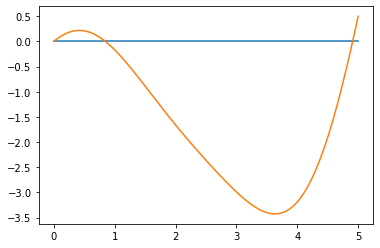

In [21]:
xvals2 = np.linspace(0, 5, int(1e3))
plt.plot(xvals2, np.zeros(xvals2.size))
plt.plot(xvals2, f2(xvals2))
print ("One Root at %1.15f" %Newtons_method1(f2,fp2,0,1e-6))
print ("Another Root at %1.15f" %Newtons_method1(f2,fp2,1,1e-6))
print ("Another Root at %1.15f" %Newtons_method1(f2,fp2,5,1e-6))

In [22]:
rootArray = {Newtons_method1(f2,fp2,0,1e-6) , Newtons_method1(f2,fp2,1,1e-6), Newtons_method1(f2,fp2,5,1e-6)}
def findAlpha(xseq, root, constant, n):
    alpha = (np.log(np.abs(xseq[n+1] - root)) - np.log(np.abs(constant))) / (np.log(np.abs(xseq[n] - root)))
    return alpha

**-4** Missing finished conclusion about convergence.

**Total: 41/50**